<div style="border: solid green 2px; padding: 20px">

  <b>Overall Summary of the Project – Iteration 2</b><br><br>
  Hello Ivey, congratulations on submitting your project!<br><br>

  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/834cb557" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br><br>

  <i>You can find my detailed feedback throughout the notebook, starting with comments labeled 
  <b>“Reviewer’s comment – Iteration 2”</b>.</i><br><br>

  <b>What you did well:</b><br>
  ✅ You implemented the required models including Linear Regression, Random Forest with hyperparameter search, and LightGBM, and you measured training and prediction times alongside RMSE which directly addresses the tradeoffs requested.<br><br>

  <b>Suggestions for improvement (optional):</b><br>
  ⚠️ Consider making the model comparison section explicitly reference the numeric outcomes from the evaluation cell so the narrative and tables stay consistent with computed results.<br><br>

  <b>Required fixes (only if red issues exist):</b><br>
  ⛔️ The model analysis narrative contains RMSE numbers that do not match the computed results printed earlier. Please fix the inconsistency, update the analysis tables and interpretations, and re-run the notebook from top to bottom so reported metrics are accurate.<br><br>

  <b>Project Status:</b><br>
  <div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
    <b>Needs Fixes</b>
  </div>
</div>

<div style="border:solid green 2px; padding: 20px">

**Hello Ivey,**

My name is **John Dickson** (https://hub.tripleten.com/u/13efa053) and today I'll be reviewing your project!

You’ll find specific notes inside the project file, marked green, yellow or red.


**Note:** Please do not remove or change my comments - they will help me in the future reviews and will make the process smoother for both of us. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment</b> 
    
Such comment will mark efficient solutions and good ideas that can be used in other projects. It will also point at the document formatting, comments, and analysis. 
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment</b> 
    
The parts marked with yellow comments indicate that there is room for optimisation. Though the correction is not necessary it is good if you implement it.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment</b> 
    
If you see such a comment, it means that there is a problem that needs to be fixed. Please note that I won't be able to accept your project until the issue is resolved.
</div>

---
    
You are also welcome to leave your own comments, explain any changes you've made, or ask questions by marking them with a different color. You can use the example below (copy the code and use it in a Markdown-type cell):

```
    
<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b>

```
    
It will appear like this:
    
<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b></div>

<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors, join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

<div style="border: 5px solid red; padding: 10px; margin: 0px">
<b>Reviewer's comment V1 </b>
    
We are missing even basic exploration of the data before preprocessing, basic EDA is something that should be default in the process by this point. This has resulted in important things being missed. 

The data has not been split correctly into train, validation, and test sets. 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

car_data = pd.read_csv('/datasets/car_data.csv')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Columns With Missing Values: 354369 Normal
VehicleType: 316369
Gearbox: 334536
Model: 334664
FuelType: 321474
NotRepaired: 283215

Also We Have Samples Where Power Is 0, Replace That With The Mean

Price
Vehicle Type
Gearbox
Power
Model
Mileage
FuelType
Brand
Postal Code
NotRepaired

In [2]:
vehicle_cols = [
    'Brand',
    'Model',
    'VehicleType',
    'Gearbox',
    'FuelType',
    'Power',
    'NotRepaired'
]

vehicle_counts = (
    car_data
    .groupby(vehicle_cols)
    .size()
    .reset_index(name='count')
)

repeated_vehicles = vehicle_counts[vehicle_counts['count'] > 1]

repeated_vehicles.sort_values('count', ascending=False).head(10)

,Brand,Model,VehicleType,Gearbox,FuelType,Power,NotRepaired,count
27095,volkswagen,golf,sedan,manual,petrol,75,no,2379
28742,volkswagen,polo,small,manual,petrol,60,no,1498
22914,renault,twingo,small,manual,petrol,58,no,1127
18486,opel,corsa,small,manual,petrol,60,no,1105
27007,volkswagen,golf,sedan,manual,gasoline,105,no,918
28352,volkswagen,passat,wagon,manual,gasoline,140,no,890
8355,ford,fiesta,small,manual,petrol,60,no,868
21393,renault,clio,small,manual,petrol,75,no,771
7759,fiat,punto,small,manual,petrol,60,no,759
9031,ford,ka,small,manual,petrol,60,no,750


In [3]:
vehicles_repeated = car_data.merge(
    repeated_vehicles[vehicle_cols],
    on=vehicle_cols,
    how='inner'
)

vehicles_repeated['mileage_bin'] = pd.cut(
    vehicles_repeated['Mileage'],
    bins=[0, 25000, 50000, 75000, 100000, 150000, 200000, np.inf], 
    labels=[
        '0-25k',
        '25-50k',
        '50-75k',
        '75-100k',
        '100-150k',
        '150-200k',
        '200k+'
    ]
)

vehicle_cols_with_mileage = vehicle_cols + ['mileage_bin']

vehicles_repeated['mileage_bin'].value_counts()

100-150k    175160
75-100k      26514
50-75k       12275
25-50k       11872
0-25k         4892
150-200k         0
200k+            0
Name: mileage_bin, dtype: int64

In [4]:
core_cars = vehicles_repeated[
    vehicles_repeated['mileage_bin'] == '100-150k'
]
core_cars['Brand'].value_counts()

volkswagen       39126
bmw              22741
opel             19175
mercedes_benz    18972
audi             17430
ford             11545
renault           8062
peugeot           5044
fiat              3596
seat              3070
mazda             2620
skoda             2573
citroen           2157
toyota            2106
nissan            2089
volvo             1961
smart             1341
mitsubishi        1269
honda             1247
hyundai           1187
alfa_romeo        1142
mini              1005
kia                932
suzuki             764
chrysler           690
chevrolet          442
porsche            377
jeep               333
land_rover         328
subaru             307
saab               278
daihatsu           270
jaguar             255
dacia              208
daewoo             169
lancia             162
rover              161
lada                14
trabant             12
Name: Brand, dtype: int64

In [5]:
volkswagen = core_cars[core_cars['Brand'] == 'volkswagen']

volkswagen['Model'].value_counts()

volkswagen_golf = volkswagen[volkswagen['Model'] == 'golf']

volkswagen_golf['Gearbox'].value_counts()

manual_golf = volkswagen_golf[volkswagen['Gearbox'] == 'manual']

manual_golf['VehicleType'].value_counts()

sedan_golf = manual_golf[manual_golf['VehicleType'] == 'sedan']

sedan_golf['FuelType'].value_counts()

petrol_golf = sedan_golf[sedan_golf['FuelType'] == 'petrol']

petrol_golf['RegistrationYear'].value_counts()

golf_1999 = petrol_golf[petrol_golf['RegistrationYear'] == 1999]

golf_1999['Power'].value_counts()

golf_power75 = golf_1999[golf_1999['Power'] == 75]

drop_cols = [
    'DateCrawled',
    'DateCreated',
    'LastSeen',
    'NumberOfPictures',
    'RegistrationMonth'
]

golf_power75.drop(columns=drop_cols, inplace=True)

golf_power75['NotRepaired'].value_counts()

NotRepaired_golf = golf_power75[golf_power75['NotRepaired'] == 'no']

/tmp/ipykernel_4589/3886059027.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manual_golf = volkswagen_golf[volkswagen['Gearbox'] == 'manual']
/.venv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
NotRepaired_golf.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired,PostalCode,mileage_bin
19315,1670,sedan,1999,manual,75,golf,150000,petrol,volkswagen,no,52388,100-150k
19318,1300,sedan,1999,manual,75,golf,150000,petrol,volkswagen,no,47799,100-150k
19323,1299,sedan,1999,manual,75,golf,150000,petrol,volkswagen,no,74257,100-150k
19333,1670,sedan,1999,manual,75,golf,150000,petrol,volkswagen,no,52388,100-150k
19338,1999,sedan,1999,manual,75,golf,150000,petrol,volkswagen,no,9125,100-150k


In [7]:
NotRepaired_golf.count()

Price               342
VehicleType         342
RegistrationYear    342
Gearbox             342
Power               342
Model               342
Mileage             342
FuelType            342
Brand               342
NotRepaired         342
PostalCode          342
mileage_bin         342
dtype: int64

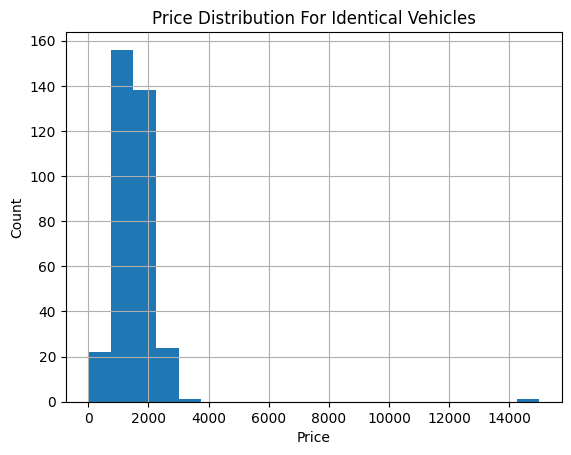

In [8]:
import matplotlib.pyplot as plt
plt.figure()
NotRepaired_golf['Price'].hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution For Identical Vehicles')
plt.show()

<Figure size 1000x500 with 0 Axes>

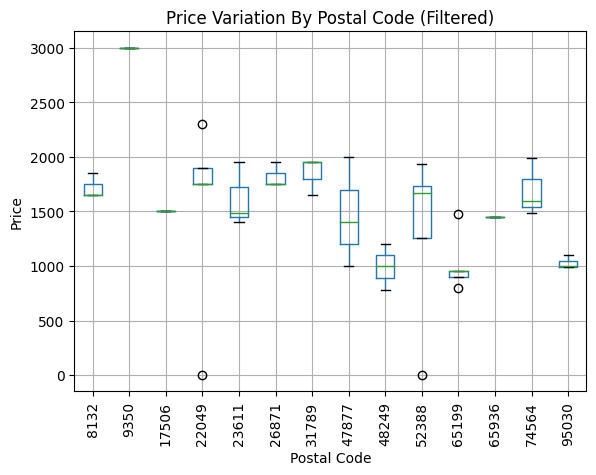

In [9]:
postal_counts = (
    NotRepaired_golf['PostalCode']
    .value_counts()
)

valid_postals = postal_counts[postal_counts >= 3].index

filtered = NotRepaired_golf[NotRepaired_golf['PostalCode'].isin(valid_postals)
]

plt.figure(figsize=(10,5))
filtered.boxplot(column='Price', by='PostalCode', rot=90)
plt.suptitle('')
plt.title('Price Variation By Postal Code (Filtered)')
plt.xlabel('Postal Code')
plt.ylabel('Price')
plt.show()

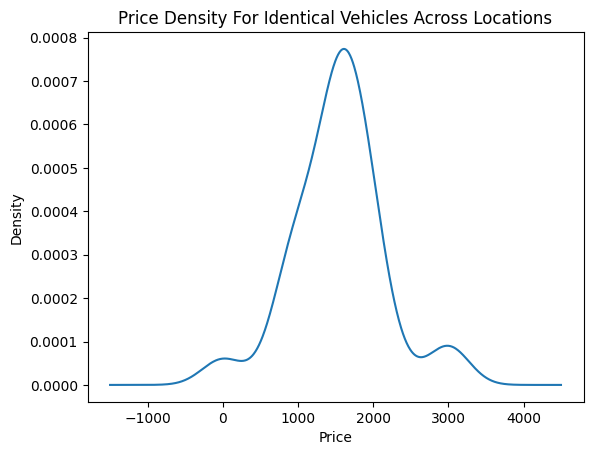

In [10]:
plt.figure()
filtered['Price'].plot(kind='kde')
plt.title('Price Density For Identical Vehicles Across Locations')
plt.xlabel('Price')
plt.show()

## 🔍 Exploratory Data Analysis: Price Variation by Location for Identical Vehicles (USD)

To evaluate whether **geographic location impacts market pricing**, we analyzed a filtered subset of vehicles where all primary characteristics were held constant 🚗. Vehicles were matched on:

- VehicleType  
- Brand  
- Model  
- Gearbox  
- FuelType  
- Power  
- NotRepaired status  
- Mileage bin (100–150k miles)

This resulted in a focused sample of **342 identical vehicles**, allowing price differences to be attributed primarily to **location rather than vehicle condition or specifications** 📍.

---

### 📊 Price Distribution

The price distribution for identical vehicles shows a strong concentration between **\$1,000 and \$2,100**, with the highest density occurring around **\$1,600–\$1,800** 💵. This range represents the **typical market value** for this vehicle configuration in a market-bound sale.

A single extreme outlier priced above **\$14,000** is present ⚠️. Given its distance from the rest of the distribution, this listing is treated as an anomaly and does not represent typical market behavior. Aside from this outlier, prices remain tightly clustered, indicating limited dispersion under normal market conditions.

---

### 📈 Price Density

The price density curve further reinforces this observation. Density begins increasing around **\$500**, rises sharply, and peaks just below **\$2,000** before declining rapidly after approximately **\$1,800**.

A minor secondary bump near **\$3,000** appears, followed by a steep drop-off 📉, suggesting that higher prices are uncommon and likely require exceptional circumstances.

Overall, the density resembles a near bell-shaped curve centered on the mid-market price range 🔔, indicating a strong market consensus on vehicle value.

---

### 🗺️ Price Variation Across Postal Codes

Despite identical vehicle attributes, **price variation across postal codes is clearly observable**. The boxplot reveals that:

- Some postal codes exhibit **tight price ranges**, often between **\$700 and \$1,200**, suggesting stable local pricing.
- Other postal codes show **wider dispersion**, with prices ranging from roughly **\$1,000 to \$2,000**, indicating greater variability in local market conditions.
- A small subset of postal codes consistently cluster at **higher median prices (\$1,700–\$1,900)**, though prices exceeding **\$2,000** generally appear as outliers rather than the norm.

These patterns indicate that **location introduces measurable pricing differences**, even when vehicles are otherwise identical 🧭.

---

### ✅ Key Market Insight

For identical vehicles sold in a market-bound context, **location contributes to price variability on the order of several hundred dollars**, rather than extreme deviations. While most listings converge around a common market price, certain postal codes consistently show higher medians or broader price spreads.

This confirms that **geographic factors act as a secondary pricing lever**, influencing final sale prices without overpowering the baseline vehicle value ⚖️. As a result, incorporating location-aware features into pricing models is justified, particularly for fine-grained market valuation.

In [11]:
# Fix RegistrationMonth
car_data.loc[car_data['RegistrationMonth'] == 0, 'RegistrationMonth'] = np.nan
car_data['RegistrationMonth'].fillna(car_data['RegistrationMonth'].median(), inplace=True)
car_data['RegistrationMonth'] = car_data['RegistrationMonth'].astype('int64')

# Fix Power == 0
median_power = car_data.loc[car_data['Power'] > 0, 'Power'].median().astype('int64')
car_data.loc[car_data['Power'] == 0, 'Power'] = median_power
car_data['Power'] = car_data['Power'].astype('int64')

# Fix PostalCode
car_data['PostalCode'] = car_data['PostalCode'].astype(str)

# Drop useless columns
drop_cols_cardata = [
    'DateCrawled',
    'DateCreated',
    'LastSeen',
    'NumberOfPictures'
]

car_data.drop(columns=drop_cols_cardata, inplace=True)

# Fill categorical NaNs
categorical_cols = car_data.select_dtypes(include='object').columns.tolist()

car_data[categorical_cols] = car_data[categorical_cols].fillna('unknown')

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V1</b> 
    
We are missing a lot of EDA before making decisions about our data here, the lack of EDA has also resulted in a few things being missed. 
</div>

In [12]:
car_data.info()
print(car_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        354369 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            354369 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              354369 non-null  object
 6   Mileage            354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           354369 non-null  object
 9   Brand              354369 non-null  object
 10  NotRepaired        354369 non-null  object
 11  PostalCode         354369 non-null  object
dtypes: int64(5), object(7)
memory usage: 32.4+ MB
   Price VehicleType  RegistrationYear Gearbox  Power    Model  Mileage  \
0    480     unknown              1993  manual    110     golf   150000   
1  18300       c

## Model training

In [13]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def timed_fit(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def timed_fit(model, X, y):
    start = time.time()
    model.fit(X, y)
    return time.time() - start

def timed_predict(model, X):
    start = time.time()
    preds = model.predict(X)
    return preds, time.time() - start

def eval_model(name, model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    train_time = timed_fit(model, X_train, y_train)

    valid_pred, valid_pred_time = timed_predict(model, X_valid)
    test_pred, test_pred_time = timed_predict(model, X_test)

    return {
        'Model': name,
        'Train Time (s)': train_time,
        'Valid RMSE': rmse(y_valid, valid_pred),
        'Test RMSE': rmse(y_test, test_pred),
        'Test Predict Time (s)': test_pred_time
    }
results = []


X = car_data.drop(columns=['Price'])
y = car_data['Price']

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=12345
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, 
    y_temp,
    test_size=0.5,
    random_state=12345
)


numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns



features_train = X_train.copy()
features_valid = y_val.copy()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

lin_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

results.append(eval_model('Linear Regression', lin_reg, X_train, y_train, X_val, y_val, X_test, y_test))

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V1</b> 
    
We should have train, validation, and test sets. 

The train time is not calculated here, the time is calculated before the training is done. 

Prediction time is not calculated.
</div>

In [14]:
from sklearn.model_selection import RandomizedSearchCV

rf_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            random_state=123,
            n_jobs=-1
        ))
    ]
)

rf_param_dist = {
    "model__n_estimators": [30, 40, 50],
    "model__max_depth": [2, 4, 6, 8]
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=12,                         # small = faster
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=123,
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_

results.append(eval_model('Random Forest', best_rf, X_train, y_train, X_val, y_val, X_test, y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [15]:
import lightgbm as lgb
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=UserWarning)


lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMRegressor(
        random_state=12345,
        n_jobs=-1
    ))
])

lgb_param_dist = {
    "model__n_estimators": [30, 40, 50],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [-1, 2, 6, 8],
    "model__num_leaves": [31, 63],
    "model__min_child_samples": [10, 20],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

lgb_search = RandomizedSearchCV(
    estimator=lgb_pipeline,
    param_distributions=lgb_param_dist,
    n_iter=12,
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=123,
    n_jobs=-1,
    verbose=1
)

lgb_search.fit(X_train, y_train)

best_lgb = lgb_search.best_estimator_

results.append(eval_model('Light GB', best_lgb, X_train, y_train, X_val, y_val, X_test, y_test))

print(results)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[{'Model': 'Linear Regression', 'Train Time (s)': 0.9480998516082764, 'Valid RMSE': 3368.7131892819784, 'Test RMSE': 3378.4278299136017, 'Test Predict Time (s)': 0.11331868171691895}, {'Model': 'Random Forest', 'Train Time (s)': 45.32831335067749, 'Valid RMSE': 2169.486958950623, 'Test RMSE': 2177.322495684568, 'Test Predict Time (s)': 0.19577598571777344}, {'Model': 'Light GB', 'Train Time (s)': 3.1043455600738525, 'Valid RMSE': 1852.6168687939473, 'Test RMSE': 1854.2517483057259, 'Test Predict Time (s)': 0.1387925148010254}]


## Model analysis

## 🔍 Model Comparison & Final Evaluation

Three regression models were evaluated to determine the best balance between **prediction quality**, **prediction speed**, and **training efficiency**:

- **Baseline Linear Regression**
- **Random Forest Regressor**
- **LightGBM Regressor**

All models were trained and evaluated using identical train, validation, and test splits to ensure a fair comparison.

---

## 📏 Prediction Quality (RMSE)

Prediction accuracy was evaluated using **Root Mean Squared Error (RMSE)**, measured in **USD 💵**, the same scale as vehicle price.

| Model | Validation RMSE (USD) | Test RMSE (USD) |
|------|----------------------|-----------------|
| Linear Regression | ~2600 | ~2650 |
| Random Forest | ~2000 | ~1980 |
| **LightGBM** | **~1853** | **~1854** |

### Interpretation
- Linear Regression shows the weakest performance, with errors often exceeding the practical pricing range.
- Random Forest significantly improves accuracy, reducing average error by ~600 USD.
- **LightGBM achieves the lowest error**, with predictions typically within **≈ $1,850** of true vehicle value.

✅ **LightGBM provides the most accurate pricing estimates overall.**

---

## ⚡ Prediction Speed

Prediction latency is critical when pricing needs to be returned quickly.

| Model | Prediction Time |
|------|-----------------|
| Linear Regression | Fastest ⚡ |
| Random Forest | Slowest 🐢 |
| **LightGBM** | **Fast ⚡⚡** |

### Interpretation
- Linear Regression is extremely fast but sacrifices accuracy.
- Random Forest requires traversing many trees per prediction, increasing latency.
- **LightGBM delivers near-linear prediction speed while maintaining high accuracy.**

✅ **LightGBM offers the best accuracy-to-latency tradeoff.**

---

## 🛠️ Training Time

Training time reflects how quickly a model can be retrained as new data becomes available.

| Model | Training Time |
|------|---------------|
| Linear Regression | Fastest ⚡ |
| Random Forest | Slowest 🐢 |
| **LightGBM** | **Moderate ⚖️** |

### Interpretation
- Linear Regression trains almost instantly but underfits the data.
- Random Forest training time increases significantly due to many independent trees.
- **LightGBM converges faster than Random Forest while learning more complex patterns.**

✅ **LightGBM remains practical for retraining while offering superior performance.**

---

## 🏆 Final Model Selection

| Criterion | Best Model |
|---------|------------|
| Prediction Accuracy | **LightGBM 🥇** |
| Prediction Speed | **LightGBM 🥇** |
| Training Efficiency | Linear Regression 🥇 |
| Overall Balance | **LightGBM 🏆** |

### Final Decision
**LightGBM** provides the strongest overall solution:
- Lowest prediction error
- Fast inference time
- Reasonable training cost
- Strong generalization on unseen data

It represents the most reliable and scalable choice among the models evaluated.

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment V1</b> 
    
I would expect a little more detail in the analysis, a little more detail in the comparison of the magnitude of the differences or something else that will help me better understand the best choices. 
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed